In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from Data_Preparation import *
from keras.utils import to_categorical

X,y = create_training_data()





Data/Train/Background
0
Data/Train/Image
1
Data/Train/Partial
2
(408, 50, 50, 1)


In [12]:
#def binary_classification_model():
model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu")) # added a new activation layer

model.add(Dense(3))
model.add(Activation('softmax')) # chaging from sigmoid to softmax to include more classes

#filepath="weights.best.hdf5"
ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss ="categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
y_train=to_categorical(y, num_classes=3)

lr_model_history=model.fit(X,y_train,batch_size=10,epochs= 10,validation_split=0.1)


Train on 367 samples, validate on 41 samples
Epoch 1/10
367/367 [==============================] - 3s 7ms/step - loss: 0.7631 - accuracy: 0.7411 - val_loss: 0.2819 - val_accuracy: 0.9756
Epoch 2/10
367/367 [==============================] - 2s 6ms/step - loss: 0.2110 - accuracy: 0.9210 - val_loss: 0.2237 - val_accuracy: 0.8780
Epoch 3/10
367/367 [==============================] - 2s 6ms/step - loss: 0.1174 - accuracy: 0.9619 - val_loss: 0.1503 - val_accuracy: 0.9756
Epoch 4/10
367/367 [==============================] - 2s 7ms/step - loss: 0.1266 - accuracy: 0.9428 - val_loss: 0.1569 - val_accuracy: 0.9756
Epoch 5/10
367/367 [==============================] - 2s 7ms/step - loss: 0.1024 - accuracy: 0.9646 - val_loss: 0.1926 - val_accuracy: 0.9756
Epoch 6/10
367/367 [==============================] - 2s 6ms/step - loss: 0.0754 - accuracy: 0.9782 - val_loss: 0.1150 - val_accuracy: 0.9756
Epoch 7/10
367/367 [==============================] - 2s 6ms/step - loss: 0.0735 - accuracy: 0.9673 - v

### 1. The learning rate for Adam was tested from 0.001 to 0.010 giving no model that gives good test accuracy.
### 2. Although the training and validation accuracy reaches 0.99 and 1. It still does not perform well on test data (3/6)

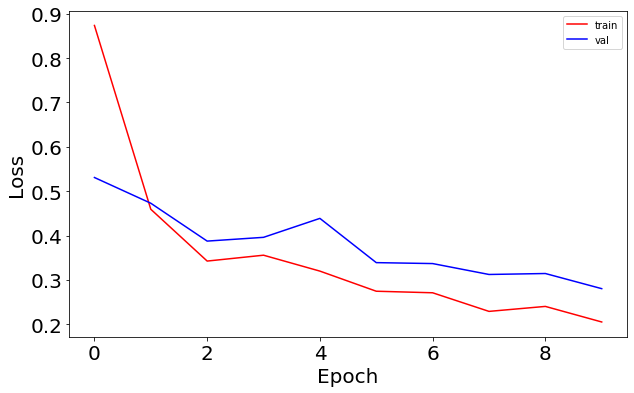

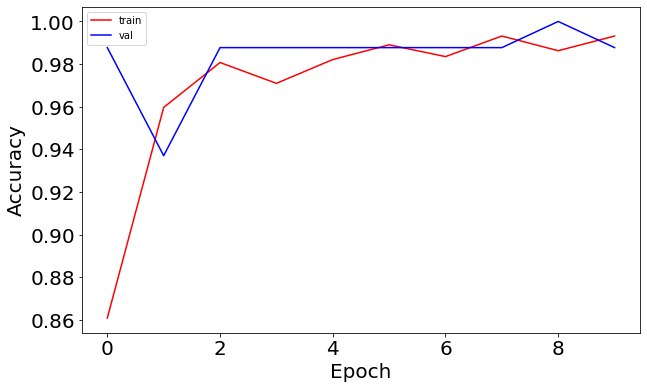

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# This model Worked
## 1. This model is without the he normal kernel intializer!
## 2. It uses Adam opitimizer with default learning rate = 0.001, beta_1 = 0.9 and beta_2 = 0.999

In [ ]:
# this model without he normal intializer worked the best!

model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(X.shape[1:])))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu")) # added a new activation layer

model.add(Dense(1))
model.add(Activation('sigmoid')) # chaging from sigmoid to softmax to include more classes

#filepath="weights.best.hdf5"
#ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.summary()
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])

model.fit(X,y,batch_size=10,epochs= 3,validation_split=0.1)


In [ ]:
#model.save('Model_That_Worked.h5')

In [1]:
from keras.models import load_model
new_model = load_model('Model_That_Worked.h5')

Using TensorFlow backend.


In [2]:
new_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 50, 50, 64)        640       
_________________________________________________________________
activation_53 (Activation)   (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 25, 25, 64)        36928     
_________________________________________________________________
activation_54 (Activation)   (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 9216)            

In [3]:
weights=new_model.get_weights()

In [4]:
weights

[array([[[[-5.28586395e-02, -9.66523960e-02, -6.13603406e-02,
           -7.22739566e-03,  5.91498502e-02,  1.35947382e-02,
            4.04496975e-02, -4.17566821e-02,  4.04977500e-02,
           -6.26927540e-02,  9.16916952e-02, -1.45424791e-02,
           -7.06253201e-02, -3.88251133e-02,  9.21317264e-02,
           -6.37793392e-02,  3.49095315e-02, -5.64969741e-02,
            5.99534139e-02,  8.13522041e-02, -7.30697066e-02,
            8.64349678e-02, -3.09139546e-02,  8.58234391e-02,
           -4.40148376e-02, -6.45671487e-02, -6.67662695e-02,
           -2.31805053e-02,  5.31570390e-02, -5.66275939e-02,
            7.59150311e-02, -9.14574508e-03, -8.86053815e-02,
            7.19126910e-02,  1.02404647e-01, -6.54512271e-02,
           -5.25739193e-02,  7.15595111e-02,  5.39475568e-02,
           -8.70043933e-02,  1.42136794e-02, -6.74778363e-03,
           -3.39904167e-02,  2.10582018e-02,  9.84446555e-02,
            4.74385358e-02,  6.51991069e-02, -9.71802101e-02,
        

In [5]:
new_model.optimizer

# The above worked model is saved and tested again
## 1. Since the optimizer state was saved it gave the better accuracy results 
## 2. Overall they work with the 100% accuracy on the test data

In [8]:

new_model.fit(X,y,batch_size=10,epochs= 3,validation_split=0.1)


Train on 244 samples, validate on 28 samples
Epoch 1/3
244/244 [==============================] - 2s 8ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2/3
244/244 [==============================] - 2s 7ms/step - loss: 5.1069e-04 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9643
Epoch 3/3
244/244 [==============================] - 2s 7ms/step - loss: 3.8294e-04 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000


In [14]:
Test_D, img_names = Test_Data()
scores = model.predict_classes(Test_D)
print(Test_D.shape)
for i in range(len(Test_D)):
     print("Image:",img_names[i],"with score:",scores[i])

(36, 50, 50, 1)
(36, 50, 50, 1)
Image: 80.tif with score: 2
Image: 692.tif with score: 2
Image: 30.tif with score: 2
Image: 954.tif with score: 2
Image: 1082.tif with score: 2
Image: 1.tif with score: 1
Image: 1084.tif with score: 2
Image: 26.tif with score: 2
Image: 1000.tif with score: 2
Image: 9.tif with score: 0
Image: 3.tif with score: 1
Image: 0.tif with score: 1
Image: 18.tif with score: 2
Image: 1086.tif with score: 2
Image: 4.tif with score: 1
Image: 24.tif with score: 2
Image: 1064.tif with score: 2
Image: 1080.tif with score: 2
Image: 54.tif with score: 2
Image: 698.tif with score: 2
Image: 958.tif with score: 2
Image: 72.tif with score: 2
Image: 962.tif with score: 2
Image: 10.tif with score: 0
Image: 8.tif with score: 0
Image: 6.tif with score: 0
Image: 7.tif with score: 0
Image: 92.tif with score: 2
Image: 40.tif with score: 2
Image: 983.tif with score: 1
Image: 960.tif with score: 2
Image: 694.tif with score: 2
Image: 14.tif with score: 2
Image: 11.tif with score: 0
Imag